In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the California Housing dataset
cal_housing = fetch_california_housing()
data = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
data['MedHouseVal'] = cal_housing.target

# Display the first few rows of the dataset
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Define the feature matrix (X) and the target vector (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


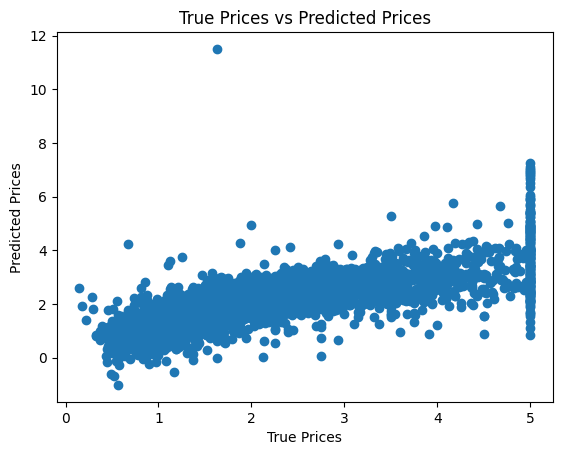

In [7]:
# Plot the true vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True Prices vs Predicted Prices')
plt.show()
